
# CSCI 6505: Machine Learning 
## Assignment 1 
##### Objective: Use python notebooks to learn about kNN, the MNIST dataset, explore the curse of dimensionality, and try out the decision tree classifer in the sklearn library.

#### Marked down: 1
### Defining class given as a starter code with the assignment

In [1]:
import numpy as np
import random
import math as m
import datetime as dt
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
class KNN:
    k=None
    num_classes=None
    train_X=None
    train_y=None
    labelled_data=None
    test_data=None
    
    def __init__(self, k , num_classes=2):
        self.k = k
        self.num_classes = num_classes

    def train(self, training_data, training_labels):
        self.train_X=training_data
        self.train_y=training_labels
        self.labelled_data=np.column_stack((self.train_X,self.train_y))
    
    def predict(self, data):
        self.test_data = data
#         print(self.labelled_data.shape[0])
        if self.k<=self.labelled_data.shape[0]:
            predictions = []
            for point in self.test_data:
                euclid_distances = euclid_dist(point,self.train_X)
                train_data=self.labelled_data
                data_with_edist = np.column_stack((self.labelled_data, euclid_distances))
                data_with_edist_sorted = data_with_edist[data_with_edist[:,-1].argsort()]
                top_k_distances = data_with_edist_sorted[:self.k]
                data_with_int_classes = top_k_distances[:,-2].astype(int) #converting classes into int from float
                predicted_class=np.array([np.argmax(np.bincount(data_with_int_classes))])
                predictions.append(predicted_class)
            predictions=np.array(predictions)
            return predictions.reshape((-1,)) 
        else:
            print("Error! Expected n_neighbors <= n_samples,  but n_samples ="+str(self.labelled_data.shape[0])+", n_neighbors ="+str(k))
   
    def accuracy(self, predictions, labels):
        if type(predictions) != None:
            temp=np.equal(labels.ravel(), predictions.ravel()).astype(int)
            #Size of bin is 2; either true or false i.e. 0 or 1.
            x=np.bincount(temp)
            #bincount returns count of 0s and 1s in the order[count(0), count(1)]
            #our 1 is True i.e. True Positive and 0 is False i.e. False Positive
            proper_classified = x[1]
            misclassified = x[0]
            accuracy = proper_classified/(proper_classified+misclassified)
            return accuracy
        else:
            print("Error in finding accuracy!")
            return "not computable"

#### Marked down: 2 
## Q1. k-Nearest Neighbours Classifier on Synthetic Data
#### Definitions of functions
>- `def train`:
    * Train the classifier using the training data and training labels.
    * Store whatever you think is neccessary in self.parameter
* `def predict(self, data)`:
    * Make use of the trained parameters to predict the class.
    * Try using np.lingalg.norm() to compute distances.
    * Input should be a LIST of d-dimensional points.
    * The return value should be a LIST of scalars between 1 and num_classes indicating for each input point how it is classified.
* `def accuracy(self, data, labels)`:
    * Returns the proportion of correct classifications computed over data.

---

__Example use__
>1. Initialize:
    * myClassifier = KNN(k=1, num_classes=2)
2. Train:
    * some_train_data = $[(1,1), (2,2), (1,-1), (-1,2)]$
    * some_train_labels = $[1, 2, 1, 2]$
    * myClassifier.train(some_train_data, some_train_labels)
3. Predict:
    * predictions = myClassifier.predict$([(-1,0), (3,3)])$
    * print(predictions) # prints $[1, 2]$
4. Accuracy:
    * acc = myClassifier.accuracy$([(1,1), (2,2), (1,-1), (-1,2)], [1, 2, 1, 2])$
    * print(acc) #prints 1.0


#### Q1. Part a) Synthetic Data Generation
>You will “train” a kNN classifier on the following training data:
* The data is 2-dimensional points in a grid, such that the $x_{1}$-coordinates and $x_{2}$-coordinates both range
from $−1.5 . . . 1.5$, with a spacing of 0.1 between points.
* A training point, $x = (x_{1}, x_{2})$, will be classified as follows:
    * Class 1 if $∥x∥_{2} ≤1$
    * Class 2 otherwise<br>
* Write code that generates this dataset and displays it using a scatterplot, using different colours for each
class.
* $∥x∥_{2}$ = ($x_{1}^{p}$ + $x_{2}^{p}$)$^{1/p}$ can be implemented by `numpy.linalg.norm([x[0], x[1]], p)`<br><br>
#### Q1. Part b) Implement kNN
>This may be best done using a Python class, with a train method that takes the training data and k as input, and a predict method that takes a test example as input and returns a class prediction. You should find the nearest neighbours by using the Euclidean distance, $∥x − y∥^{2}$.
* `np.array(np.meshgrid(x_1,x_2)).T.reshape(-1,2)`: Creates an array of all combinations of 2 NumPy arrays, x_1 and x_2<br> <br>
* Calculating euclidean distance i.e. ${\displaystyle d((\mathbf {x} ,\mathbf {y}),(\mathbf {a},\mathbf {b}) )={\sqrt {(x-a)^{2}+(y-b)^{2}}}}$ 
using norm function `np.linalg.norm(arr_1-arr_2,axis=1)`





In [2]:
def euclid_dist(test_point, train_data):
    calc_dist =np.linalg.norm(train_data-test_point, ord=2, axis=1)
    return calc_dist

def generate(granularity, order):
    x_1 = np.around(np.arange(-1.5,1.6,granularity),1)
    x_2 = np.around(np.arange(-1.5,1.6,granularity),1)
    data_no_labels = np.around(np.array(np.meshgrid(x_1,x_2)).T.reshape(-1,2),1)
    labelled_data = get_labels(data_no_labels, order)
    return labelled_data[:,[0,1]], labelled_data[:,2]
    
def get_labels(data, order):
    lbl=np.linalg.norm(data, order, axis=1)
    data_with_labels=np.column_stack((data, lbl))
    lbl[lbl<=1]=1
    lbl[lbl>1]=2
    data_with_labels[:,2]=lbl    
    return data_with_labels

def split_data(X, y, train_size, rs=None):
    data=np.column_stack((X,y))
    if type(rs)==int:
        np.random.seed(rs)
    else:
        pass
    np.random.shuffle(data)
    factor=round(train_size,1)
    split_rows=int(len(X)*factor)
    train = data[:split_rows]
    test = data[split_rows:]
    train_x = train[:,[0,1]]
    train_y = train[:,[2]]
    test_x = test[:,[0,1]]
    test_y = test[:,[2]]
    return train_x, train_y, test_x ,test_y
def scatter_plot(train_x,train_y,test_x,test_y, preds):
    colors_train=['orange','yellow']
    fig = plt.figure(figsize=(8,8))
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    train_y=train_y.reshape((-1,))
    plt.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap=matplotlib.colors.ListedColormap(colors_train))
    orange_patch = mpatches.Patch(color='orange', label='Class 1 Train')
    yellow_patch = mpatches.Patch(color='yellow', label='Class 2 Train')
    if preds is None:
        plt.title("Scatter plot of dataset")
        plt.legend(handles=[orange_patch, yellow_patch])
    else:
        plt.xlim(-2,2.5)
        plt.ylim(-2,2.5)
        colors_test=['red', 'blue']
        plt.title("Scatter plot of dataset with predicted class of test points")
        plt.scatter(test_x[:,0], test_x[:,1], c=preds, marker='o',edgecolors="gray", cmap=matplotlib.colors.ListedColormap(colors_test))
        red_patch = mpatches.Patch(color='red', label='Class 1 Test')
        blue_patch = mpatches.Patch(color='blue', label='Class 2 Test')
        plt.legend(handles=[orange_patch, yellow_patch, red_patch, blue_patch])
    plt.show()
def plot_KvsAcc(k_list, accuracy):
    plt.title('Accuracy Vs. K')
    plt.plot(k_list, accuracy, label = 'Testing Accuracy')
    plt.legend()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
def plot_SampleVsAcc(sample, accuracy):
    plt.title('Accuracy Vs. Sample')
    plt.plot(sample, accuracy, label = 'Testing Accuracy')
    plt.legend()
    plt.xlabel('Sample')
    plt.ylabel('Accuracy')
    plt.show()

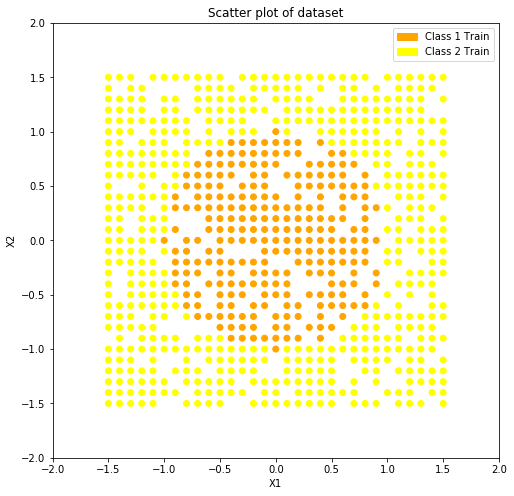

Accuracy for k=1 is 0.9430051813471503
Accuracy for k=2 is 0.9378238341968912
Accuracy for k=3 is 0.9637305699481865
Accuracy for k=4 is 0.9430051813471503
Accuracy for k=5 is 0.9689119170984456
Accuracy for k=10 is 0.9792746113989638
Accuracy for k=20 is 0.9792746113989638
Accuracy for k=30 is 0.9792746113989638
Accuracy for k=40 is 0.9792746113989638
Accuracy for k=50 is 0.9689119170984456
Accuracy for k=60 is 0.9689119170984456
Accuracy for k=70 is 0.9689119170984456
Accuracy for k=80 is 0.9637305699481865
Accuracy for k=100 is 0.9637305699481865


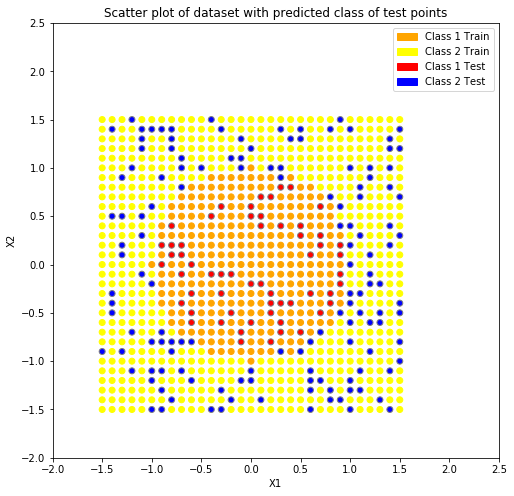

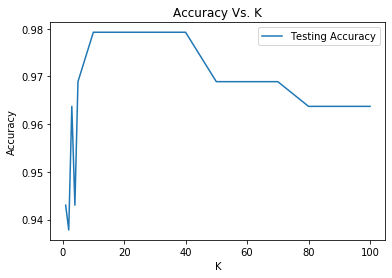

In [3]:
import time
k_list_d1=[1,2,3,4,5,10,20,30,40,50,60,70,80,100]
acc=[]
X_d1, y_d1 = generate(0.1,2)
train_x_d1, train_y_d1, test_x_d1, test_y_d1 = split_data(X_d1, y_d1, 0.8, 20)
scatter_plot(train_x_d1,train_y_d1,test_x_d1,test_x_d1, None)
for k in k_list_d1:
    knn_d1=KNN(k, num_classes=2)
    knn_d1.train(train_x_d1, train_y_d1)
    predictions_d1 = knn_d1.predict(test_x_d1)
    print("Accuracy for k="+str(k)+" is "+str(knn_d1.accuracy(predictions_d1, test_y_d1)))
    acc.append(knn_d1.accuracy(predictions_d1, test_y_d1))
scatter_plot(train_x_d1,train_y_d1,test_x_d1,test_x_d1, predictions_d1)
plot_KvsAcc(k_list_d1, acc)

#### Marked down: 3
#### Q1. Part c) Visualize the data
>Use the `matplotlib.pyplot.contourf` function to display how your kNN classifier performs on new data. To do this, evaluate your model’s predictions across a fairly fine `numpy.meshgrid`, with a space of about $10^{−2}$ between points. The meshgrid can have boundaries from $−1.5$ to $1.5$ in both coordinates. By examining multiple plots, can you say how the performance of the classifier depends on k?<br><br>
__Ans__: The graph of Accuracy vs K shows us the performance variance of the classifier

In [ ]:
k_list_fine=[3,4,5,6,7,20,30,50,70,80,100,]
acc_fine=[]
for k in k_list_fine:
    test_X_fine, test_y_fine =  generate(0.01,2)
    knn_fine=KNN(k, num_classes=2)
    knn_fine.train(train_x_d1, train_y_d1)
    t=time.time()
    predictions_fine = knn_fine.predict(test_X_fine)
    print("Time to predict:"+str(time.time()-t))
    # print("Time taken to predict: "+str(time.clock()-t))
    print("Accuracy for k="+str(k)+" is "+str(knn_fine.accuracy(predictions_fine, test_y_fine)))
    acc_fine.append(knn_fine.accuracy(predictions_fine, test_y_fine))
    print('-'*50)
    x_plt = test_X_fine[:,0].reshape((310,310))
    y_plt = test_X_fine[:,1].reshape((310,310))
    predictions_plt = predictions_fine.reshape((310,310))
    plt.contourf(x_plt,y_plt,test_y_fine.reshape((310,310)), colors=['pink','white'], levels=1)
    plt.contour(x_plt,y_plt,predictions_plt,colors=['purple'], levels=0)
    plt.show()
plot_KvsAcc(k_list_fine,acc_fine)

#### Marked down: 4
#### Question: By examining multiple plots, can you say how the performance of the classifier depends on k?
Through examination of plots in the range of k_list_fine, the performance of the classifier is not significantly dependent on k having 11 data points with <br>
Mean $(μ)$: 97.076923076923 <br>
Variance $(σ^{2})$: 2.53 <br>
Examine the k Vs Accuracy plot


#### Marked down: 5
#### Q1. Part d) Try another data set
>Repeat part a), replacing the condition $∥x∥_{2}$ ≤ 1 with $∥x∥_{1}$ ≤ 1, and repeat part c) on the new training data. How does the performance of the classifier change with k? (Try some extreme values!)<br><br>
>__ANS__: The graph of k vs accuracy shows the change in performance of the classifier with k 

In [ ]:
k_list_d2=[3,4,5,6,7,20,80,100,300,400,600]
acc_d2=[]
for k in k_list_d2:
    test_X_d2, test_y_d2 =  generate(0.01,1)
    train_X_d2, train_y_d2 = generate(0.1,1)
    knn_d2=KNN(k, num_classes=2)
    knn_d2.train(train_X_d2, train_y_d2)
    t=time.time()
    predictions_d2 = knn_d2.predict(test_X_d2)
    print("Time to predict:"+str(time.time()-t))
    # print("Time taken to predict: "+str(time.clock()-t))
    print("Accuracy for k="+str(k)+" is "+str(knn_d2.accuracy(predictions_d2, test_y_d2)))
    acc_d2.append(knn_d2.accuracy(predictions_d2, test_y_d2))
    x_plt = test_X_d2[:,0].reshape((310,310))
    y_plt = test_X_d2[:,1].reshape((310,310))
    predictions_plt = predictions_d2.reshape((310,310))
    plt.contourf(x_plt,y_plt,test_y_d2.reshape((310,310)), colors=['pink','white'], levels=1)
    plt.contour(x_plt,y_plt,predictions_plt,colors=['purple'], levels=0)
    plt.show()
    print('-'*50)
plot_KvsAcc(k_list_d2,acc_d2)

#### Marked down: 6
#### Q1. Part e) Continue exploring data sets.
>Repeat part a), replacing the condition $∥x∥_{2} ≤ 1$ with $∥x∥_{0.4} ≤ 1$, repeat part c) with the data. Now how does the performance of the classifier change with k? Based on your results, do you think using Euclidean distance for kNN is always the best choice?<br><br>
__Ans__: Euclidean distance may not be always the best choice with knn. For vectors in vectors in $ℝ_{p}$, if 𝑝 is very high, then Euclidean distance is not a good measure, as it tends to make the distances too uniform

In [ ]:
import time
k_list_d3=[3,4,50,100,700]
t=time.time()
acc_d3=[]
for k in k_list_d3:
    test_X_d3, test_y_d3 =  generate(0.01,0.4)
    train_X_d3, train_y_d3 = generate(0.1, 0.4)
    knn_d3=KNN(k, num_classes=2)
    knn_d3.train(train_X_d3, train_y_d3)
    t_1=time.time()
    predictions_d3 = knn_d3.predict(test_X_d3)
    print("Time to predict: {}".format(time.time()-t_1))
    print("Accuracy for k="+str(k)+" is "+str(knn_d3.accuracy(predictions_d3, test_y_d3)))
    acc_d3.append(knn_d3.accuracy(predictions_d3, test_y_d3))
    print('-'*50)
plot_KvsAcc(k_list_d3,acc_d3)
print("Total elpased time: {} ".format(time.time()-t))


#### Marked down: 7
## Q2. k-Nearest Neighbours Classifier on MNIST Data
> #### In this question you will use the K-nearest neighbours (KNN) classifier, implemented in Q1, to classify the MNIST images.


#### Marked down: 8
#### Visualizing dataset through plotting

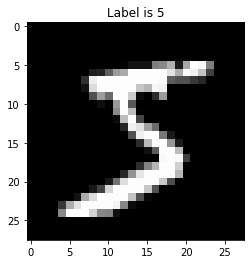

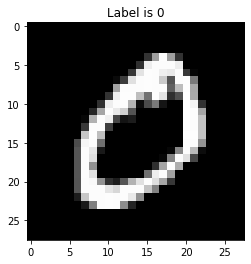

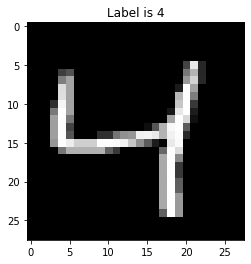

--------------------------------------------------


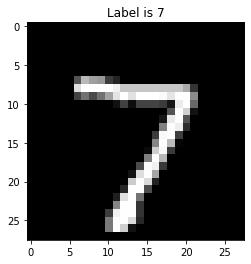

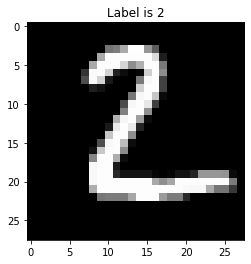

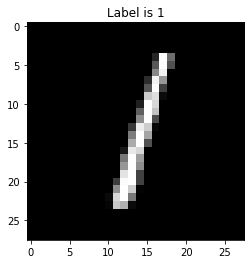

In [8]:
import csv
with open('mnist_train.csv', 'r') as csv_file:
    count=0
    for data in csv.reader(csv_file):
        label = data[0]
        pixels = data[1:]
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28))
        # Plot
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        count+=1
        if (count==3):
            break
print("-"*50)
with open('mnist_test.csv', 'r') as csv_file:
    count=0
    for data in csv.reader(csv_file):
        label = data[0]
        pixels = data[1:]
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28))
        # Plot
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        count+=1
        if (count==3):
            break


#### Marked down: 9
#### Loading Dataset

In [9]:
t=time.time()
train_data_mnist=np.loadtxt('mnist_train.csv',delimiter=',')
test_data_mnist=np.loadtxt('mnist_test.csv',delimiter=',')
print("Time to load: "+str(time.time()-t))
train_data_mnist.shape, test_data_mnist.shape

Time to load: 45.980841875076294


((60000, 785), (10000, 785))

#### Marked down: 10
#### Splitting dataset

In [17]:
t=time.time()
train_y_mnist=train_data_mnist[:10000,0]#first number of each line is the label and rest are image pixels
train_X_mnist=np.delete(train_data_mnist,0,axis=1)[:10000]#returns an array deleting the first value i.e. label in our dataset
test_y_mnist=test_data_mnist[:1000,0]#first number of each line is the label and rest are image pixels
test_X_mnist=np.delete(test_data_mnist,0,axis=1)[:1000]#returns an array deleting the first value i.e. label in our dataset
print("Time to split: "+str(time.time()-t))

Time to split: 0.33620786666870117


#### Marked down: 11
#### Q2. a) Explore k values. 
>Plot the classification accuracy on train and test sets by considering different values of k in the range of 1 to 100.

In [ ]:
k_list_mnist=[2,3,4,5,10,20,30,40,50,60,70,80,90,100]
acc_mnist=[]
for k in k_list_mnist:
    mnist_knn=KNN(k,num_classes=10)
    mnist_knn.train(train_X_mnist,train_y_mnist)
    t=time.time()
    predicitons_mnist = mnist_knn.predict(test_X_mnist[:])
    print('Total time: {}'.format(time.time()-t))
#     print(predicitons_mnist)
    print("Accuracy for k="+str(k)+" is "+str(mnist_knn.accuracy(predicitons_mnist,test_y_mnist)))
    acc_mnist.append(mnist_knn.accuracy(predicitons_mnist,test_y_mnist))
    print('-'*50)

plot_KvsAcc(k_list_mnist, acc_mnist)

#### Marked down: 12
#### Q2. b) Explore data set size. 
>Plot the classification accuracy on train and test sets by considering different amounts of training data (randomly select the train samples ranging from 100 to 60,000) by considering the best value of k as obtained in part (a).

In [ ]:
#we got best K= owing to the observation in the previous question 
best_k=5
acc_mnist=[]
train_data_splits=[100,500,1000,3000,4000,5000,10000,15000]
for split in train_data_splits:
    t=time.time()
    train_y_mnist=train_data_mnist[:split,0]#first number of each line is the label and rest are image pixels
    train_X_mnist=np.delete(train_data_mnist,0,axis=1)[:split]#returns an array deleting the first value i.e. label in our dataset
    test_y_mnist=test_data_mnist[:1000,0]#first number of each line is the label and rest are image pixels
    test_X_mnist=np.delete(test_data_mnist,0,axis=1)[:1000]#returns an array deleting the first value i.e. label in our dataset
#     print("Time to split: "+str(time.time()-t))
    train_X_mnist.shape,test_X_mnist.shape,train_y_mnist.shape,test_y_mnist.shape
    mnist_knn=KNN(best_k,num_classes=10)
    mnist_knn.train(train_X_mnist,train_y_mnist)
    t=time.time()
    predicitons_mnist = mnist_knn.predict(test_X_mnist[:])
    print('Total time: {}'.format(time.time()-t))
    #     print(predicitons_mnist)
    print("Accuracy for train_sample="+str(split)+" is "+str(mnist_knn.accuracy(predicitons_mnist,test_y_mnist)))
    acc_mnist.append(mnist_knn.accuracy(predicitons_mnist,test_y_mnist))
    print('-'*50)
plot_SampleVsAcc(train_data_splits, acc_mnist)


#### Marked down: 13
#### Q2. c) Explore image resolutions. 
>What happens if you repeat part (a) but reduce the resolution of the data sets?

In [41]:
test_data_2=np.loadtxt('mnist_test.csv',delimiter=",")
train_data_2=np.loadtxt('mnist_train.csv',delimiter=',')

In [43]:
def resize_img(img):
    original_image = img
    width , height = 14,14
    resized_image = np.zeros(shape=(width,height))

    for W in range(width):
        for H in range(height):
            new_width = int( W * original_image.shape[0] / width )
            new_height = int( H * original_image.shape[1] / height )
            resized_image[W][H] = original_image[new_width][new_height]

#     print("Resized image size : " , resized_image.shape)
    return resized_image

train_y=train_data_2[:,0]
train_x=np.delete(train_data_2,0,axis=1)
test_y=test_data_2[:,0]
test_x=np.delete(test_data_2,0,axis=1)
resized_imgs=[]
count=1
for img in test_x[:]:
  print(count)
  count+=1
  reshaped_img=img.reshape((28,28))
  # print(reshaped_img.shape)
  resized_img=resize_img(reshaped_img)
  resized_imgs.append(resized_img)
train_x_14=np.array(resized_imgs)
test_x_14=np.array(resized_imgs)
train_x_14=train_x_14.reshape((60000,196))
test_x_14=test_x_14.reshape((10000,196))
temp_knn=KNN(3)
temp_knn.train(train_x_14,train_y)
preds=temp_knn.predict(test_x_14)
print(temp_knn.accuracy(preds,test_y))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390


4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232


6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220


8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208


9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000


ValueError: cannot reshape array of size 1960000 into shape (60000,196)

#### Marked down: 14
## Q3. The Curse of Dimensionality
### Q3. a) Computing expectation in 2D. 

>Take two continuous random variables, X and Y , sampled from a uniform distribution over the interval [0,1]. Let Z be the squared Euclidean distance, defined by $Z = (X − Y)^{2}$ . Compute $E[Z]$ and $Var[Z]$ (this will require integration, which you can compute numerically using scipy.integrate.dblquad). Explain the integrals that you are computing.
* $Var[Z]=E[Z^{2}]-(E[Z])^{2}$
* $E[Z]$ can be computed using
><img src="dintegral.png"><br>
> Given in the image, we are computing a double intergral over f(x,y) with limits [0,1]

In [20]:
from scipy.integrate import dblquad
f=lambda x,y:(x-y)**2
g=lambda x,y:(x-y)**4
E_Z, err = dblquad(f,0.0,1.0,lambda x:0,lambda x:1)#E(Z)
E_Z2, err = dblquad(g,0.0,1.0,lambda x:0,lambda x:1)#E(Z^2)
print(E_Z,E_Z2)
variance=(E_Z2-(E_Z**2))
print("E[Z]: {}, Var[Z]: {}".format(E_Z, variance))

0.16666666666666666 0.06666666666666667
E[Z]: 0.16666666666666666, Var[Z]: 0.03888888888888889


#### Marked down: 15
### Q3. b) Computing expected distances in n-d. 
>Take two continuous random variables, X and Y , sampled from a uniform distribution over the unit cube in d dimensions. That is, if X = ($X_{1}$, $X_{2}$, . . . , $X_{d}$)then each X_{i} is uniformly sampled from $[0, 1]$, independently from each other. The squared Euclidean distance can be written as $R = Z_{1}+Z_{2}+· · ·+Z_{d}$, where $Z_{i} = (X_{i}−Y_{i})^{2}$ . Compute $E[R]$ and $Var[R]$. You can write your answers in terms of d, $E[Z]$, and $Var[Z]$. Again, you may explore this question empirically/numerically."

In [21]:
from scipy import integrate

def f(x, y, z=0, d=10):
    for i in range (0,d):
        z+=(x-y)**2
    return z
def g(x, y, z=0, d=10):
    for i in range (0,d):
        z+=(x-y)**4
    return z
def bounds_y():
    return [0, 1]

def bounds_x(y):
    return [0, 1]

E_Z_d, err = integrate.nquad(f, [bounds_x, bounds_y])
E_Z2_d, err = integrate.nquad(g, [bounds_x, bounds_y])
variance=(E_Z2_d-(E_Z_d**2))
d=10
print("D: {}, E(X): {}, Var(X): {}".format(str(d),str(E_Z_d),str(variance)))


D: 10, E(X): 1.6666666666666665, Var(X): -2.1111111111111107


#### Marked down: 16
## Q4. Decision Trees
#### Use the sklearn library to run a decision tree classifier on each of the main datasets you used in the rest of the assignment:

> Q4. a) Let $D_{p}$ refer to the dataset from Question 1, for different values of p, e.g. $D_{2}$ refers to the dataset generation using the Euclidean norm, etc. Run a decision tree classifier on $D_{1}$, $D_{2}$, and at least 2 other values of p.

In [22]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#### Marked down: 17
##### Decision Tree Classifier for value of $D_{p}$ where $p=[0.4, 1, 2, 3]$

In [23]:

p_list=[0.4,1,2,3]
for d in p_list:
    X_dt, y_dt = generate(0.1,d)
    train_x_dt, train_y_dt, test_x_dt, test_y_dt = split_data(X_dt, y_dt, 0.8, 15)
    clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
    clf_dt = clf.fit(train_x_dt,train_y_dt)#D=3
#Predict the response for test dataset
    y_pred_dt = clf.predict(test_x_dt)#D=2
    print("Accuracy of Decision Tree Classifier with D="+str(d)+": "+str(metrics.accuracy_score(test_y_dt, y_pred_dt)))

Accuracy of Decision Tree Classifier with D=0.4: 0.9896373056994818
Accuracy of Decision Tree Classifier with D=1: 0.9378238341968912
Accuracy of Decision Tree Classifier with D=2: 0.9792746113989638
Accuracy of Decision Tree Classifier with D=3: 0.9844559585492227


#### Marked down: 18
>Q4. b) Write code (not using built-in sklearn functionality) to split MNIST the training set to get a validation
set. Then, using sklearn’s built-in DecisionTreeClassifier, write a function which tries 4-6 different
values for max depth and both information gain and Gini coefficient split criteria, and outputs the accuracies
on the train, on the validation, and on the test sets . What would be the meta-parameter settings that you would normally choose? Note that usually you would not run the classifier on the test set! This is simply a chance to experiment with (i.e. take a peek at) how the performance on the test set would change. Briefly

In [26]:
# Create Decision Tree classifer object
import time
train_data_2=np.loadtxt('mnist_train.csv',delimiter=',')
test_data_2=np.loadtxt('mnist_test.csv',delimiter=',')


In [27]:
train_x_2=train_data_2[:,1:]
train_y_2=train_data_2[:,0]
test_x_2=test_data_2[:,1:]
test_y_2=test_data_2[:,0]
train_x_2.shape,train_y_2.shape

((60000, 784), (60000,))

In [ ]:
from sklearn.model_selection import train_test_split as ttt
train_x_2,val_x_2,train_y_2,val_y_2=ttt(train_x_2,train_y_2,test_size=0.2, random_state=12)
train_x_2.shape,val_x_2.shape,train_y_2.shape,val_y_2.shape
max_depths=[10,20,30,100,150,200,250]
criteria=['gini','entropy']
train_accs={}
val_accs={}
test_accs={}
for criterion in criteria:
  train_accs[criterion]=[]
  val_accs[criterion]=[]
  test_accs[criterion]=[]
  for max_depth in max_depths:
    dct=DecisionTreeClassifier(max_depth=max_depth,criterion=criterion)
    dct.fit(train_x_2,train_y_2)
    train_preds=dct.predict(train_x_2)
    train_score=dct.score(train_x_2,train_y_2)
    train_accs[criterion].append((max_depth,train_score))
    val_preds=dct.predict(val_x_2)
    val_score=dct.score(val_x_2,val_y_2)
    val_accs[criterion].append((max_depth,val_score))
    test_preds=dct.predict(test_x_2)
    test_score=dct.score(test_x_2,test_y_2)
    test_accs[criterion].append((max_depth,test_score))
    


In [ ]:
train_accs

In [ ]:
test_accs

In [ ]:
val_accs

## References

`Q1. b)`      [bincount func](https://stackoverflow.com/questions/51177738/what-is-the-use-of-bincount-method-from-numpy/51177829)

`Q2. a)` [displaying mnist data using MPL](https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot)

`Q3. a)` [dblquad function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html)

`Q3. b)` [nquad function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.nquad.html#scipy.integrate.nquad)

`Q4. a)` [Decision Tree Classifier](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)